In [1]:
import cv2

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Normal Images

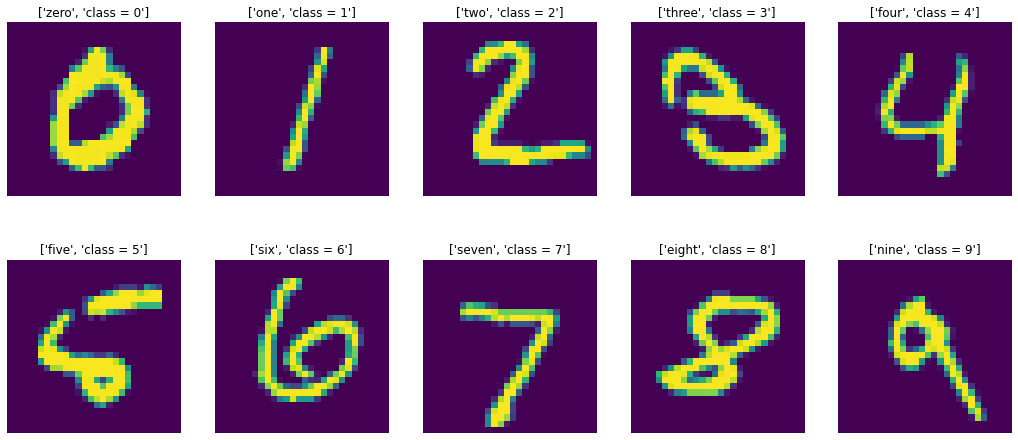

In [3]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

images = []
fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_test==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_test[ind[0][0]].squeeze())
    images.append(x_test[ind[0][0]])
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')
images=np.array(images)

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
features (Flatten)           (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [7]:
batch_size =256
epochs = 5
load_data='False'
if load_data == 'False':
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)
  model.save(folder_data + '/model_saved') # save trained model
else: 
  model = keras.models.load_model(folder_data + '/model_saved')


Epoch 1/5
211/211 [==============================] - 10s 10ms/step - loss: 0.5000 - accuracy: 0.8495 - val_loss: 0.1003 - val_accuracy: 0.9728
Epoch 2/5
211/211 [==============================] - 1s 6ms/step - loss: 0.1398 - accuracy: 0.9575 - val_loss: 0.0717 - val_accuracy: 0.9805
Epoch 3/5
211/211 [==============================] - 1s 6ms/step - loss: 0.1008 - accuracy: 0.9688 - val_loss: 0.0552 - val_accuracy: 0.9863
Epoch 4/5
211/211 [==============================] - 1s 6ms/step - loss: 0.0864 - accuracy: 0.9735 - val_loss: 0.0499 - val_accuracy: 0.9860
Epoch 5/5
211/211 [==============================] - 1s 6ms/step - loss: 0.0759 - accuracy: 0.9767 - val_loss: 0.0436 - val_accuracy: 0.9867


NameError: name 'folder_data' is not defined

Let's apply some DL interpretability techniques to further understand the DL feature extraction and classification procedure. Let's consider the full DL model architecture

Check dimensions of all convolutional layers in the architecture

In [9]:
for layer in model.layers:
	if 'conv' not in layer.name:
		continue
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


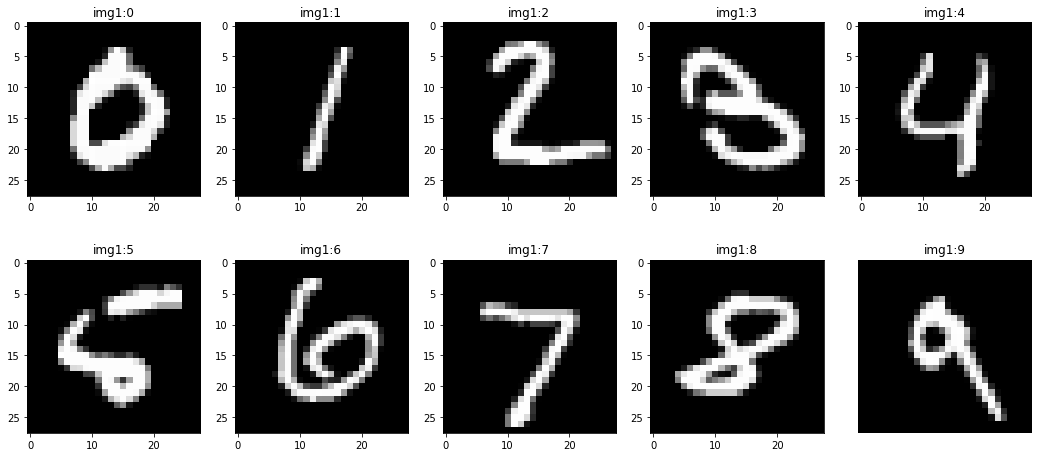

In [10]:

def plot_images(images):
    fig = plt.figure(figsize=(18, 8))

    k=0
    for i in range(2):
        for j in range(5):
            ax = fig.add_subplot(2, 5, k+1)
            ax.imshow(images[k], cmap='gray') 
            ax.set_title('img1:'+ str(k))
            k+=1

    ax.axis('off')
    plt.show()
plot_images(images)



In [11]:
def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear
    return current_model

In [12]:
from tf_keras_vis.activation_maximization import ActivationMaximization
import tensorflow as tf
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization.callbacks import PrintLogger as Logger
from tf_keras_vis.activation_maximization.callbacks import GifGenerator2D

def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear
    return current_model


C:\Users\akash\AppData\Local\Temp/ipykernel_18012/809992304.py:6: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activations = activation_maximization(score,callbacks=[Logger(interval=50)])


Steps: 050	Scores: [[-117.81645202636719]],	Regularization: [('TotalVariation2D', [21.41356086730957]), ('Norm', [35.821632385253906])]
Steps: 100	Scores: [[386.5289001464844]],	Regularization: [('TotalVariation2D', [15.558344841003418]), ('Norm', [33.702972412109375])]
Steps: 150	Scores: [[792.6654052734375]],	Regularization: [('TotalVariation2D', [16.088123321533203]), ('Norm', [32.46238327026367])]
Steps: 200	Scores: [[247.2953338623047]],	Regularization: [('TotalVariation2D', [9.370784759521484]), ('Norm', [31.0861759185791])]
Steps: 050	Scores: [[27.178064346313477]],	Regularization: [('TotalVariation2D', [35.42503356933594]), ('Norm', [37.933135986328125])]
Steps: 100	Scores: [[-94.17219543457031]],	Regularization: [('TotalVariation2D', [23.429109573364258]), ('Norm', [38.09518814086914])]
Steps: 150	Scores: [[327.7249450683594]],	Regularization: [('TotalVariation2D', [16.936119079589844]), ('Norm', [38.13002395629883])]
Steps: 200	Scores: [[132.6046905517578]],	Regularization: [

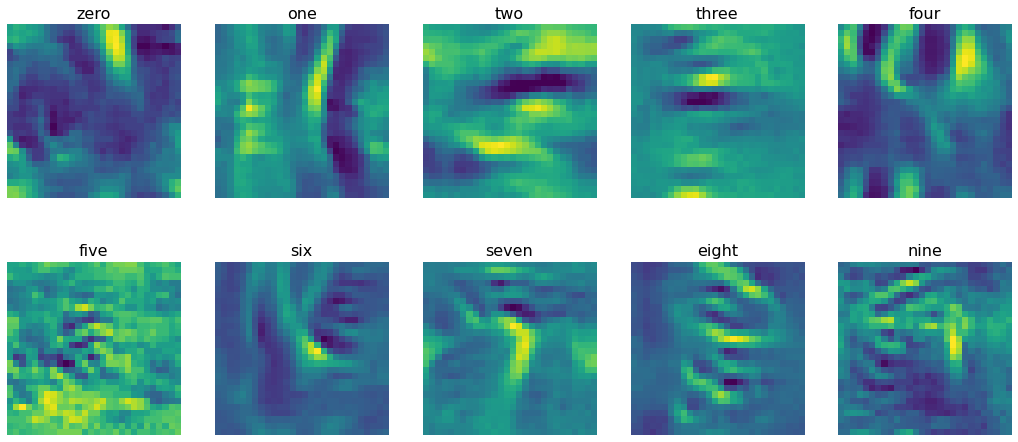

In [14]:
fig = plt.figure(figsize=(18, 8))
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for kclass in range(0,10):
    score = CategoricalScore(kclass)
    activation_maximization = ActivationMaximization(model,model_modifier,clone=False)
    activations = activation_maximization(score,callbacks=[Logger(interval=50)])
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(activations.squeeze())
    ax.set_title(class_names[kclass], fontsize=16)
    ax.axis('off')

## Gaussian Noise 

In [20]:
from skimage.util import random_noise
x_train_gaus=[]
for i in range(len(x_train)):
    noise_img= random_noise(x_train[i], mode='gaussian')
    x_train_gaus.append(noise_img)

In [21]:
x_test_gaus=[]
for i in range(len(x_train)):
    noise_img= random_noise(x_train[i], mode='gaussian')
    x_test_gaus.append(noise_img)

In [22]:
gaus_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [50]:
batch_size =256
epochs = 5
gaus_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
gaus_model.fit(np.array(x_train_gaus), y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/5
211/211 [==============================] - 1s 5ms/step - loss: 0.5465 - accuracy: 0.8353 - val_loss: 0.1140 - val_accuracy: 0.9697
Epoch 2/5
211/211 [==============================] - 1s 4ms/step - loss: 0.1479 - accuracy: 0.9552 - val_loss: 0.0737 - val_accuracy: 0.9812
Epoch 3/5
211/211 [==============================] - 1s 4ms/step - loss: 0.1099 - accuracy: 0.9675 - val_loss: 0.0603 - val_accuracy: 0.9838
Epoch 4/5
211/211 [==============================] - 1s 4ms/step - loss: 0.0906 - accuracy: 0.9723 - val_loss: 0.0510 - val_accuracy: 0.9872
Epoch 5/5
211/211 [==============================] - 1s 4ms/step - loss: 0.0803 - accuracy: 0.9754 - val_loss: 0.0474 - val_accuracy: 0.9868


C:\Users\akash\AppData\Local\Temp/ipykernel_18012/3654177838.py:6: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activations = activation_maximization(score,callbacks=[Logger(interval=50)])


Steps: 050	Scores: [[1426.173828125]],	Regularization: [('TotalVariation2D', [30.8244686126709]), ('Norm', [35.732791900634766])]
Steps: 100	Scores: [[361.84112548828125]],	Regularization: [('TotalVariation2D', [11.651978492736816]), ('Norm', [33.94122314453125])]
Steps: 150	Scores: [[222.6859588623047]],	Regularization: [('TotalVariation2D', [14.500882148742676]), ('Norm', [32.86716079711914])]
Steps: 200	Scores: [[226.0621337890625]],	Regularization: [('TotalVariation2D', [11.901803016662598]), ('Norm', [31.637596130371094])]
Steps: 050	Scores: [[644.4065551757812]],	Regularization: [('TotalVariation2D', [22.99231719970703]), ('Norm', [36.66347122192383])]
Steps: 100	Scores: [[715.5116577148438]],	Regularization: [('TotalVariation2D', [15.960855484008789]), ('Norm', [36.58129119873047])]
Steps: 150	Scores: [[625.1194458007812]],	Regularization: [('TotalVariation2D', [11.533151626586914]), ('Norm', [36.6331672668457])]
Steps: 200	Scores: [[406.13690185546875]],	Regularization: [('Tota

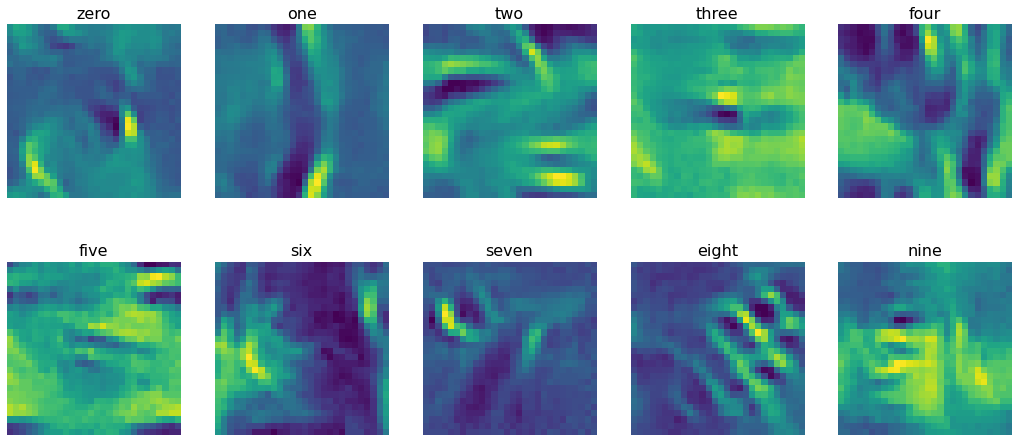

In [51]:
fig = plt.figure(figsize=(18, 8))
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for kclass in range(0,10):
    score = CategoricalScore(kclass)
    activation_maximization = ActivationMaximization(gaus_model,model_modifier,clone=False)
    activations = activation_maximization(score,callbacks=[Logger(interval=50)])
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(activations.squeeze())
    ax.set_title(class_names[kclass], fontsize=16)
    ax.axis('off')

## Salt Noise

In [60]:
from skimage.util import random_noise
x_train_salt=[]
for i in range(len(x_train)):
    noise_img= random_noise(x_train[i], mode='s&p')
    x_train_salt.append(noise_img)

In [61]:
x_test_salt=[]
for i in range(len(x_train)):
    noise_img= random_noise(x_train[i], mode='s&p')
    x_test_salt.append(noise_img)

In [62]:
salt_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [63]:
batch_size =256
epochs = 5
salt_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
salt_model.fit(np.array(x_train_salt), y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/5
211/211 [==============================] - 1s 5ms/step - loss: 0.5760 - accuracy: 0.8234 - val_loss: 0.1295 - val_accuracy: 0.9632
Epoch 2/5
211/211 [==============================] - 1s 5ms/step - loss: 0.1711 - accuracy: 0.9479 - val_loss: 0.0876 - val_accuracy: 0.9770
Epoch 3/5
211/211 [==============================] - 1s 4ms/step - loss: 0.1245 - accuracy: 0.9617 - val_loss: 0.0695 - val_accuracy: 0.9815
Epoch 4/5
211/211 [==============================] - 1s 4ms/step - loss: 0.1021 - accuracy: 0.9691 - val_loss: 0.0604 - val_accuracy: 0.9830
Epoch 5/5
211/211 [==============================] - 1s 5ms/step - loss: 0.0896 - accuracy: 0.9724 - val_loss: 0.0526 - val_accuracy: 0.9862


C:\Users\akash\AppData\Local\Temp/ipykernel_18012/2150246916.py:6: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activations = activation_maximization(score,callbacks=[Logger(interval=50)])


Steps: 050	Scores: [[1227.2265625]],	Regularization: [('TotalVariation2D', [31.698902130126953]), ('Norm', [35.410831451416016])]
Steps: 100	Scores: [[387.2644348144531]],	Regularization: [('TotalVariation2D', [19.841106414794922]), ('Norm', [33.41671371459961])]
Steps: 150	Scores: [[311.411376953125]],	Regularization: [('TotalVariation2D', [13.31843376159668]), ('Norm', [32.15791320800781])]
Steps: 200	Scores: [[188.2189483642578]],	Regularization: [('TotalVariation2D', [8.950183868408203]), ('Norm', [31.47568702697754])]
Steps: 050	Scores: [[-87.72770690917969]],	Regularization: [('TotalVariation2D', [29.080461502075195]), ('Norm', [34.05941390991211])]
Steps: 100	Scores: [[206.0155029296875]],	Regularization: [('TotalVariation2D', [21.082462310791016]), ('Norm', [33.69998550415039])]
Steps: 150	Scores: [[-86.12362670898438]],	Regularization: [('TotalVariation2D', [14.061389923095703]), ('Norm', [33.344085693359375])]
Steps: 200	Scores: [[112.58657836914062]],	Regularization: [('Tota

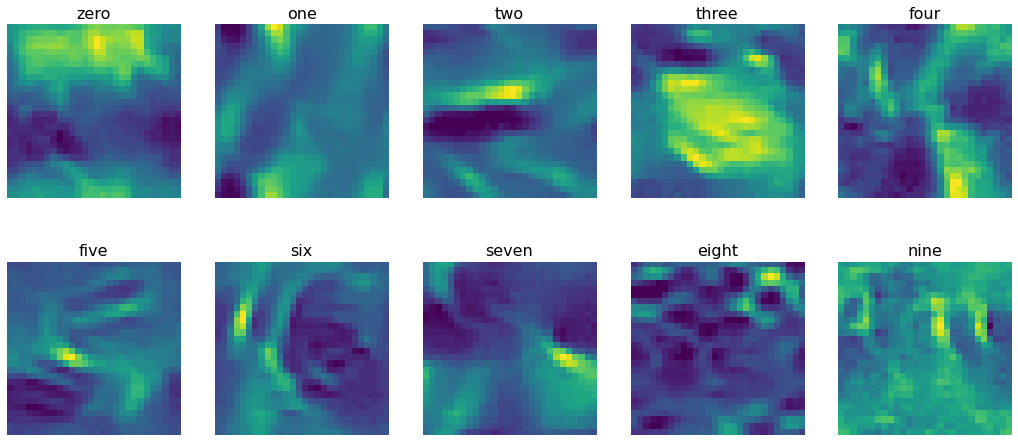

In [64]:
fig = plt.figure(figsize=(18, 8))
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for kclass in range(0,10):
    score = CategoricalScore(kclass)
    activation_maximization = ActivationMaximization(salt_model,model_modifier,clone=False)
    activations = activation_maximization(score,callbacks=[Logger(interval=50)])
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(activations.squeeze())
    ax.set_title(class_names[kclass], fontsize=16)
    ax.axis('off')

## Adversarial Noise

In [80]:
def generate_image_adversary(model, image, label, eps=0.05):
	image = tf.cast(image, tf.float32)
	with tf.GradientTape() as tape:
		tape.watch(image)
		pred = model(image)
		loss = tf.keras.losses.MSE(label, pred)
	gradient = tape.gradient(loss, image)
	signedGrad = tf.sign(gradient)
	adversary = (image + (signedGrad * eps)).numpy()
	return adversary

In [44]:
g_train=[]
for i in range(len(x_train)):
    gen=generate_image_adversary(model,np.expand_dims(x_train[i],axis=0),y_train[i])
    g_train.append(gen)
    print(i,end='\r')

In [45]:
g_test=[]
for i in range(len(x_test)):
    gen=generate_image_adversary(model,np.expand_dims(x_test[i],axis=0),y_train[i])
    g_test.append(gen)
    print(i,end='\r')

In [57]:
np.squeeze(np.array(g_train),axis=1).shape

(60000, 28, 28, 1)

In [46]:
ad_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [58]:
batch_size =256
epochs = 5
ad_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
ad_model.fit(np.squeeze(np.array(g_train),axis=1), y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
211/211 [==============================] - 2s 5ms/step - loss: 11.9034 - accuracy: 0.5003 - val_loss: 13.3700 - val_accuracy: 0.4353
Epoch 2/5
211/211 [==============================] - 1s 5ms/step - loss: 11.7540 - accuracy: 0.4838 - val_loss: 13.1582 - val_accuracy: 0.6585
Epoch 3/5
211/211 [==============================] - 1s 5ms/step - loss: 10.6114 - accuracy: 0.5124 - val_loss: 8.3545 - val_accuracy: 0.4450
Epoch 4/5
211/211 [==============================] - 1s 5ms/step - loss: 11.8672 - accuracy: 0.5776 - val_loss: 14.2807 - val_accuracy: 0.7250
Epoch 5/5
211/211 [==============================] - 1s 5ms/step - loss: 12.8275 - accuracy: 0.6136 - val_loss: 11.1179 - val_accuracy: 0.6840


C:\Users\akash\AppData\Local\Temp/ipykernel_18012/2110077845.py:6: DeprecationWarning: Call to deprecated class PrintLogger. (Use `Progress` instead.) -- Deprecated since version 0.7.0.
  activations = activation_maximization(score,callbacks=[Logger(interval=50)])


Steps: 050	Scores: [[12714.341796875]],	Regularization: [('TotalVariation2D', [51.970314025878906]), ('Norm', [57.12189865112305])]
Steps: 100	Scores: [[13783.05859375]],	Regularization: [('TotalVariation2D', [45.38954544067383]), ('Norm', [66.94075775146484])]
Steps: 150	Scores: [[8263.951171875]],	Regularization: [('TotalVariation2D', [40.320926666259766]), ('Norm', [74.86842346191406])]
Steps: 200	Scores: [[10931.8203125]],	Regularization: [('TotalVariation2D', [36.65903854370117]), ('Norm', [82.01826477050781])]
Steps: 050	Scores: [[4964.06982421875]],	Regularization: [('TotalVariation2D', [32.639610290527344]), ('Norm', [44.27845764160156])]
Steps: 100	Scores: [[2069.851318359375]],	Regularization: [('TotalVariation2D', [30.09830093383789]), ('Norm', [46.644710540771484])]
Steps: 150	Scores: [[4350.6708984375]],	Regularization: [('TotalVariation2D', [24.760427474975586]), ('Norm', [48.49984359741211])]
Steps: 200	Scores: [[79.50133514404297]],	Regularization: [('TotalVariation2D',

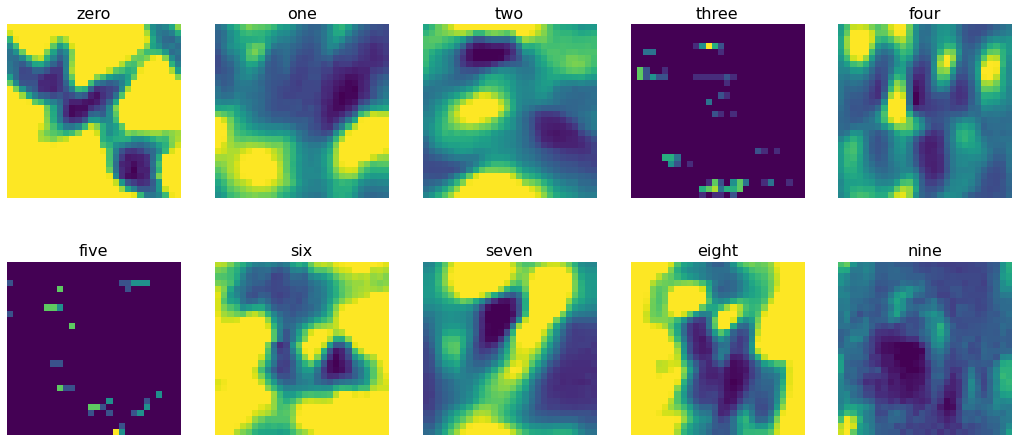

In [59]:
fig = plt.figure(figsize=(18, 8))
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for kclass in range(0,10):
    score = CategoricalScore(kclass)
    activation_maximization = ActivationMaximization(ad_model,model_modifier,clone=False)
    activations = activation_maximization(score,callbacks=[Logger(interval=50)])
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(activations.squeeze())
    ax.set_title(class_names[kclass], fontsize=16)
    ax.axis('off')

In [67]:
x_train[0].shape

(28, 28, 1)

In [71]:
noise= np.squeeze(g_train[1],axis=0)-x_train[1]

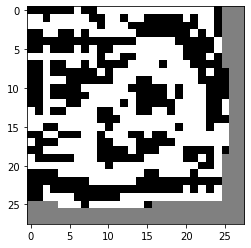

In [73]:
plt.imshow(noise,cmap='gray')

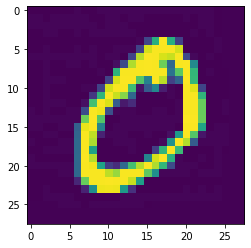

In [76]:
plt.imshow(np.squeeze(g_train[1],axis=0))